In [5]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
import anndata 
from pathlib import Path
import matplotlib.pyplot as plt

In [29]:
min_cells = 10
samples = 2
cutoff_bootstrap = 0.5
min_cells_DE = 10
pct_mt_counts = 10

In [32]:
project_folder = Path ('/scratch/mfafouti/Mommybrain/Slide_tags/Filtering')
in_dir = project_folder / 'NEW_list_merged_filtered'
out_dir = project_folder / 'out'
out_dir.mkdir(exist_ok=True)
fig_path = out_dir / 'QC_plot.png'

ad_path = in_dir / "Merged_n=207903_all_metadata_slide_tags.h5ad"
adata = sc.read_h5ad(ad_path)

In [33]:
# ============= DOUBLETS =============
adata = adata[adata.obs["scDblFinder.class"] == "singlet"].copy()

In [34]:
# ============= MITOCHONDRIA =============
adata.var['mt'] = adata.var['gene_symbol'].str.startswith('Mt-')
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True, log1p = False)

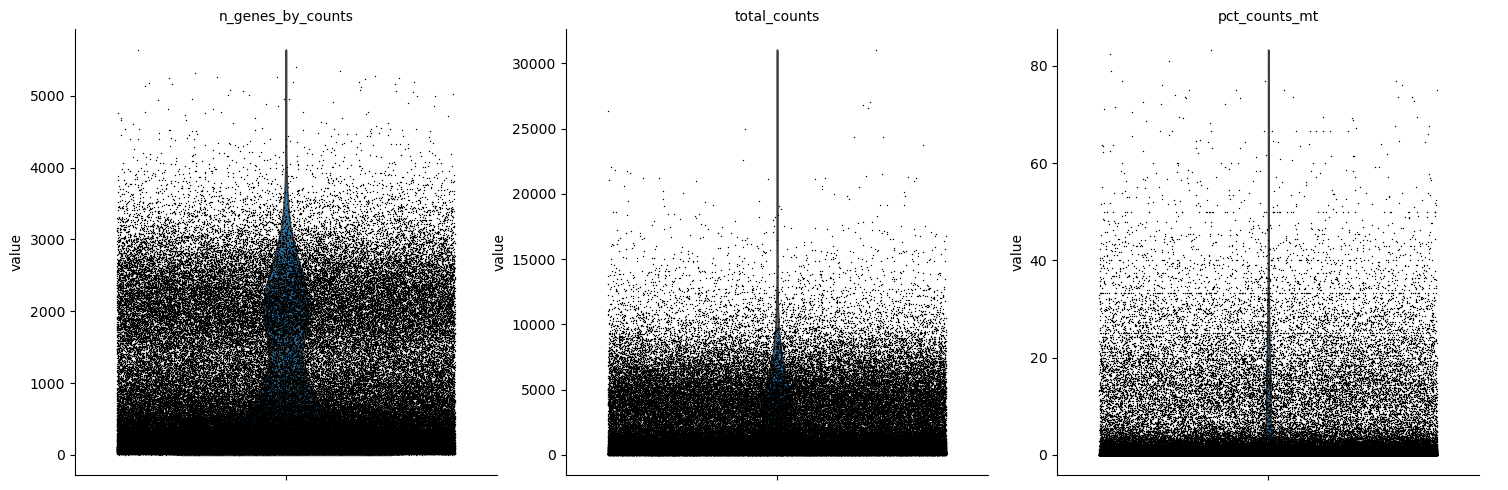

In [35]:
# Diagnostic plots 
sc.pl.violin(adata, 
             keys=['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, 
             multi_panel=True
            )

In [37]:
sum_mt_cells = (adata.obs['pct_counts_mt'] < pct_mt_counts).sum()
print(f'{sum_mt_cells} cells have more than {pct_mt_counts}% mitochondrial genes')
# subsetting
adata = adata[adata.obs['pct_counts_mt'] < pct_mt_counts].copy()

138785 cells have more than 10% mitochondrial genes


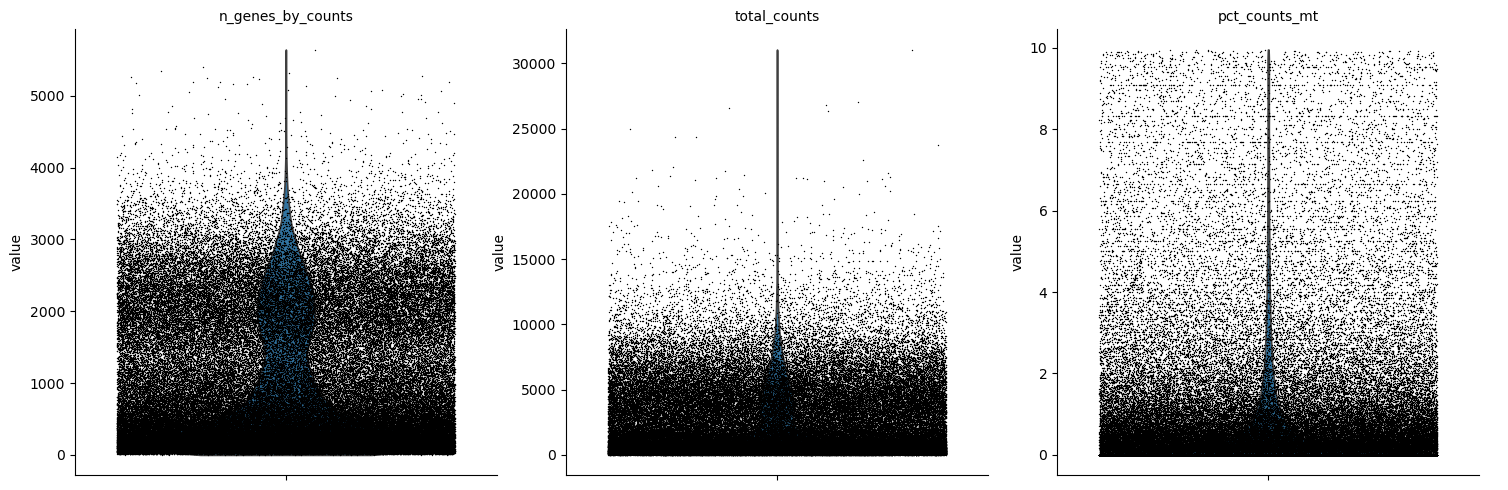

In [38]:
# Diagnostic plots 
sc.pl.violin(adata, 
             keys=['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, 
             multi_panel=True
            )

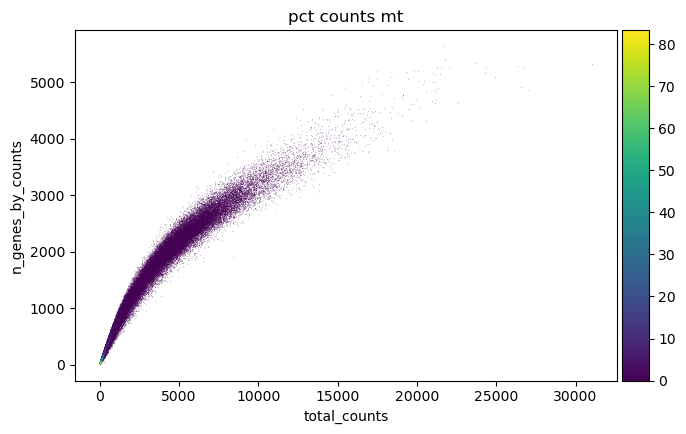

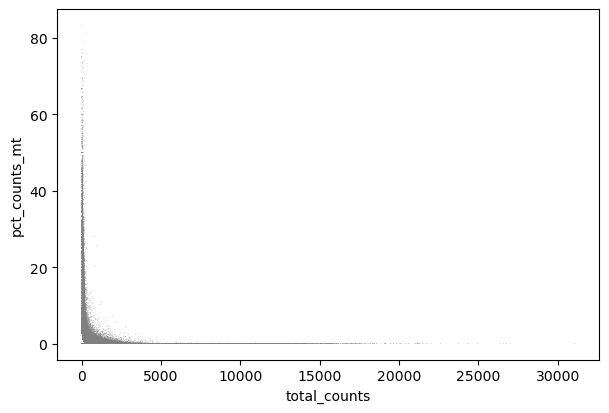

In [18]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')

In [ ]:
# ============= UMI filtering =============
# sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)